In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [58]:
df.shape

(27820, 12)

In [59]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [60]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
18409,Panama,2003,male,15-24 years,48,301615,15.91,Panama2003,NaN,"13,693,981,200",4790,Millenials
23605,Spain,1991,female,55-74 years,299,4013100,7.45,Spain1991,NaN,"575,598,537,070",15574,Silent
2940,Barbados,1989,female,15-24 years,2,24000,8.33,Barbados1989,NaN,"2,015,731,029",8541,Generation X
25233,Thailand,2010,male,35-54 years,1166,9786527,11.91,Thailand2010,0.716,"341,105,009,515",5707,Generation X
23514,South Africa,2014,male,5-14 years,4,5285360,0.08,South Africa2014,0.666,"350,904,575,292",7174,Generation Z


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [62]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [63]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [65]:
df.duplicated().sum()

0

In [66]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [67]:
# laver ny column så gdp for year bliver til numeric i stedet for et objekt

df['gdp_for_year'] = (
    df[' gdp_for_year ($) ']
      .str.replace(r'[^\d]', '', regex=True)
      .astype(float)
)


In [68]:
df = df.drop(columns=['country-year', ' gdp_for_year ($) ', 'generation'])


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   gdp_for_year        27820 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [70]:
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df['age_encoded'] = df['age'].cat.codes

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(2)
memory usage: 1.8+ MB


In [72]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2


In [73]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [74]:
# 2. Build a mapping dict (alphabetical order here, but you can choose any)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# 3. Apply it
df['country_numeric'] = df['country'].map(country_map)

# 4. (Optional) inspect your mapping
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [75]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded,sex_numeric,country_numeric
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1,1,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1,2,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5,1,1
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2,1,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
 10  sex_numeric         27820 non-null  int64   
 11  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 2.2+ MB


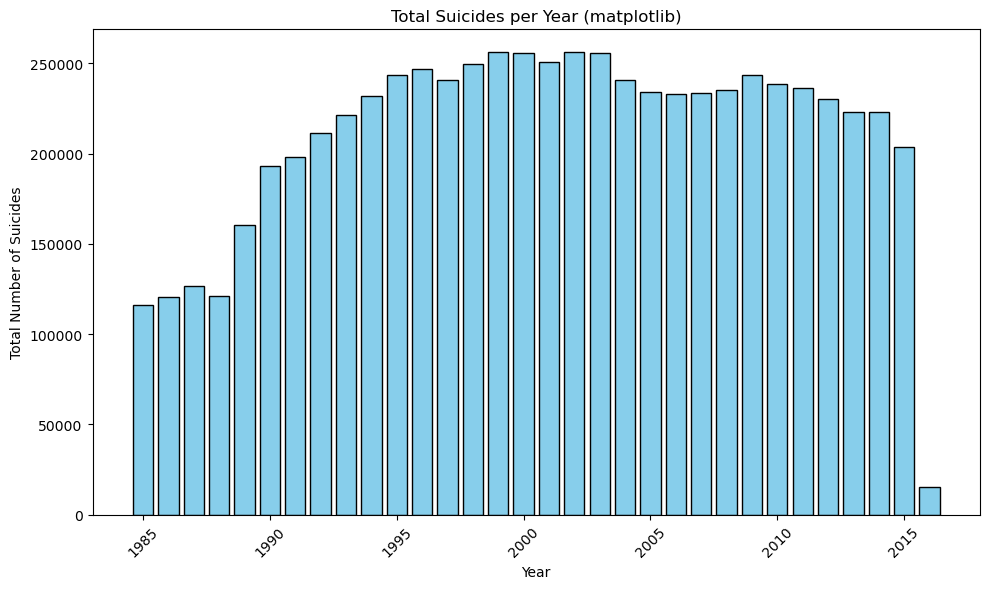

In [77]:
# 2. Aggregate total suicides per year
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# 3a. Plot with matplotlib
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# Fjern alle rows i 2016, da dataen fra det år er minimalt
df = df[df['year'] != 2016]

# Tjek at den er væk
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


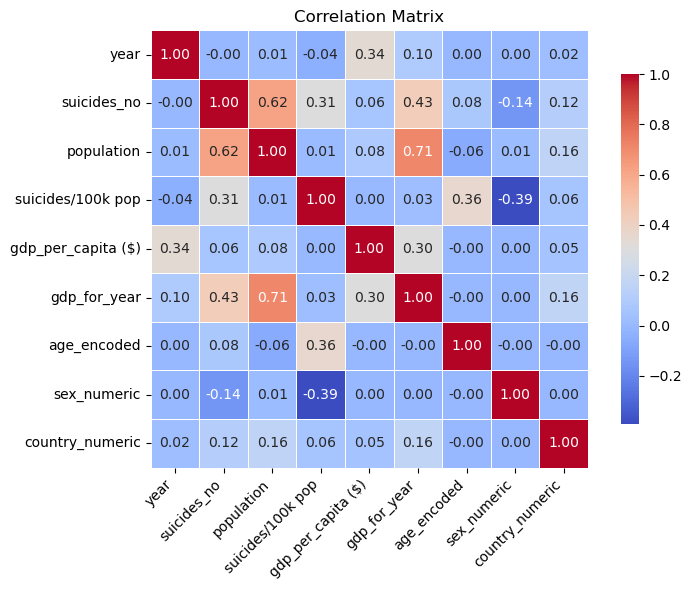

In [79]:
# 6. Compute correlation matrix on all numeric columns
corr = df.corr(numeric_only=True)

# 7. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

   age_encoded  suicides_no          age
0            0        52264   5-14 years
1            1       807347  15-24 years
2            2      1121842  25-34 years
3            3      2446375  35-54 years
4            4      1653728  55-74 years
5            5       651261    75+ years


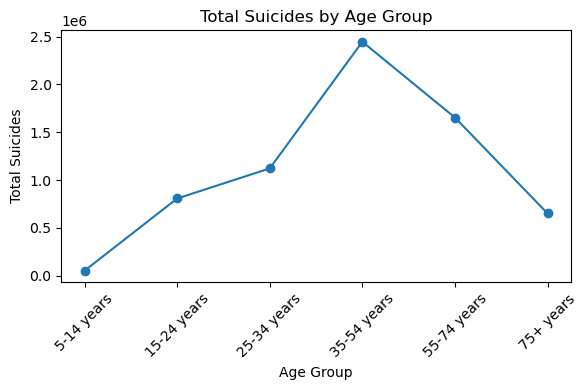

In [80]:
# Age encoded gav ikke et helt forventet resultat, så vi laver et nyt plot for at se den rigtige korrelation
age_totals = df.groupby('age_encoded', as_index=False)['suicides_no'].sum()

# Map back to labels for plotting
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

print(age_totals)

# Plot the relationship
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides_no'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Age Group')
plt.tight_layout()
plt.show()

   sex_numeric  suicides_no     sex
0            1      5176811    male
1            2      1556006  female


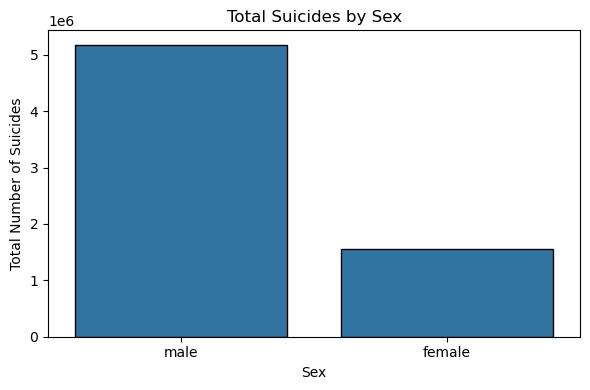

In [81]:
# 1. Sørg for at sex_numeric findes
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Aggrér total suicider per køn
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides_no'].sum()

# 3. Map tal tilbage til labels
sex_map = {1: 'male', 2: 'female'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

print(sex_totals)


plt.figure(figsize=(6,4))
sns.barplot(data=sex_totals, x='sex', y='suicides_no', edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides by Sex')
plt.tight_layout()
plt.show()
